# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pickle
import seaborn as sns

import pandas as pd

from os import listdir
from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy import ndimage

from tensorflow.contrib.layers import flatten

import random

%matplotlib inline

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_valid, y_train_valid = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_valid[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train_valid, y_test), axis=0)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

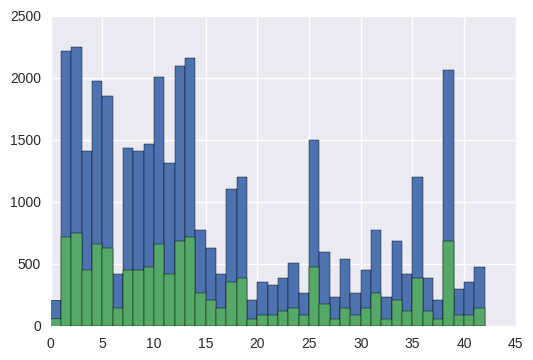

In [5]:
def visual_classes(data):
    bins = np.unique(data)
    plt.hist(data, bins=bins)
    
visual_classes(y_train_valid)
visual_classes(y_test)

In [6]:
signnames = pd.read_csv('signnames.csv')['SignName'].tolist()

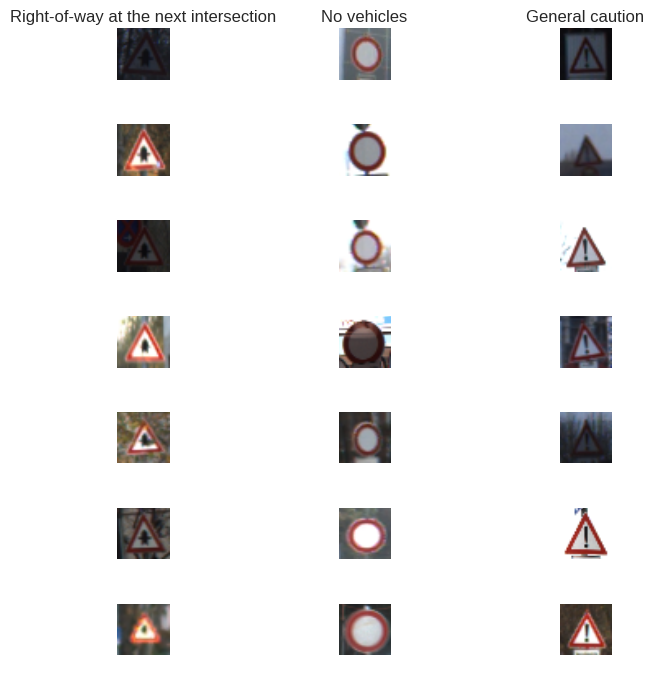

In [133]:
n_vis_classes = 3
n_vis_examples = 7

vis_classes = random.sample(signnames, n_vis_classes)

plt.figure(figsize=(7,7))

for offset, cls in enumerate(vis_classes):
    idxs = np.flatnonzero(y_train_valid == signnames.index(cls))
    idxs = np.random.choice(idxs, n_vis_examples, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * n_vis_classes + offset + 1
        plt.subplot(n_vis_examples, n_vis_classes, plt_idx)
        plt.imshow(X_train_valid[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [9]:
# def normalize(images):
#     return images/255

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I did not preprocess data there.

Particularly, I did not convert to grayscale because important features would be lost in this case, because colors contains valuable information about traffic sign.

Also I tried sort of normalization here and accuracy decreased from 89% to 88%. So I didn't use it either (it's commented above).

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [11]:
### TODO: add more training examples to training set by rotating image
def rotated_copies(img, angles):
    result = [ndimage.rotate(img, angle, reshape=False) for angle in angles]
    return result

In [13]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_valid, 
                                                                y_train_valid,
                                                                test_size=0.20)

In [ ]:
angles = [-10, -5, -3, 3, 5, 10]

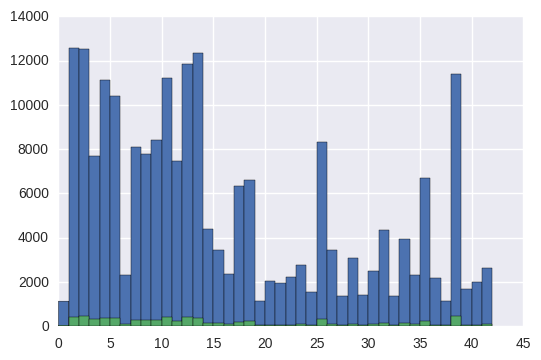

In [14]:
X_train_append = []
y_train_append = []

for image, label in zip(X_train, y_train):
    X_train_append.extend(rotated_copies(image, angles=angles))
    y_train_append.extend(np.repeat(label, len(angles)))

X_train = np.concatenate((X_train, X_train_append))
y_train = np.concatenate((y_train, y_train_append))

visual_classes(y_train)
visual_classes(y_validation)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I generated additional data by rotating images 10, 5, 3, -3, -5, -10 degrees. I found it reasonable because in real life traffic sign can be slightly rotated depending on road conditions. And because these images are different (although not very much) from original images, I believe my model will benefit from it and be more robust to different angles of traffic signs in real life.

Testing data was provided so I did not touch it. I separated data provided for training + additional data into _real_ testing set and validation set.

In [15]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I was not able to improve architecture of the network. Every change I made to architecture only decreased accuracy. Frankly I do not have any idea how to improve it. I was only able to increase accuracy by generating additional data. So I used LeNet architecture with minor changes. I only modified depth in input layer and number of classes in output layer. I was not able to use a lot of different architectures because training was very slow on my gtx 970 (maybe it is because I set it up incorrectly, because Keras implementation of this exact architecture was trained significantly faster, I'll research it deeper).

Architecture I used contains 2 convolutional layers (in my first submission I accidentaly wrote 3 conv. layers) with ReLU activation and 2 max pooling after each of them them. After that there are three fully connected layers with ReLU activations.

Convolution kernels have width and height of 5 pixels. The first convolutional layer has depth of 6. The second convolutional layer has depth of 16. Strides for both convolutional layers are 1.

Max pooling layers have kernels width and height of 2 as well as width and height strides.

First fully connected layer has width (I suppose it is correct term for that) of 120. Second one has width of 84. And the last one has width of 43 which is equal to total number of classes.

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, 43)

rate = 0.0001
BATCH_SIZE = 256
EPOCHS = 50

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training')
    print()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}...".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, 'arch')
    print('Model saved.')

Training

EPOCH 1...
Validation accuracy = 0.548

EPOCH 2...
Validation accuracy = 0.729

EPOCH 3...
Validation accuracy = 0.815

EPOCH 4...
Validation accuracy = 0.867

EPOCH 5...
Validation accuracy = 0.897

EPOCH 6...
Validation accuracy = 0.917

EPOCH 7...
Validation accuracy = 0.933

EPOCH 8...
Validation accuracy = 0.941

EPOCH 9...
Validation accuracy = 0.947

EPOCH 10...
Validation accuracy = 0.953

EPOCH 11...
Validation accuracy = 0.958

EPOCH 12...
Validation accuracy = 0.960

EPOCH 13...
Validation accuracy = 0.964

EPOCH 14...
Validation accuracy = 0.965

EPOCH 15...
Validation accuracy = 0.968

EPOCH 16...
Validation accuracy = 0.968

EPOCH 17...
Validation accuracy = 0.968

EPOCH 18...
Validation accuracy = 0.971

EPOCH 19...
Validation accuracy = 0.972

EPOCH 20...
Validation accuracy = 0.972

EPOCH 21...
Validation accuracy = 0.974

EPOCH 22...
Validation accuracy = 0.973

EPOCH 23...
Validation accuracy = 0.973

EPOCH 24...
Validation accuracy = 0.975

EPOCH 25...
Val

In [132]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))

Test Accuracy = 0.898


## Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** For optimizer I used Adam optimizer because I read it is considered best default option for most cases and it works faster than SGD.

I used default batch size because model did not benefited from changing it to either side (I tried 64 and 256). However I read that bigger batch size leads to better accuracy.

I used 50 epochs because model definitely stopped learning around this number according to validation accuracy.

As I wrote above, changing of arhitecture did not help. So did changing depth, width and heigth of layers. For that reason I left them by default.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** As my main goal was to increase accuracy I thought accuracy could be increased with:
1. different architecture
2. different hyperparameters
3. preprocessing data
4. more data
5. something else

I was not able to increase accuracy using first two points. 

The first preprocessing technic I was able to perform was grayscaling that seemed to decrease accuracy, so I did not use it for the final solution. I also tried to decrease scale of features but that also decreased accuracy.

I generated more data and my model benefited from it (I know I shouldn't do this, but I used the same architecture and parameters and tested models trained on original data and on generated data on _test set_. The gain was about 1%).

I did not come up with something else.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

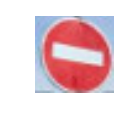

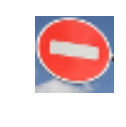

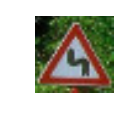

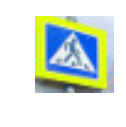

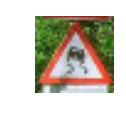

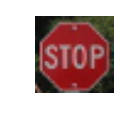

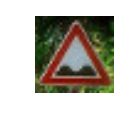

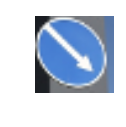

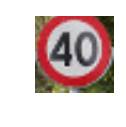

In [58]:
path = 'processed'
imgs = listdir(path)
images_list = [mpimg.imread(join(path,i)) for i in imgs]
images = np.stack(images_list, axis=0)

for image in images:
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.grid('off')
    plt.axis('off')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Some images may not be classified correctly because of lighting conditions or angle of view. I believe it can be solved with more data and more sophisticated preprocessing.

Another source for errors is different sign standards in different countries. For example, in Russia pedestrians sign is white triangle on blue square, while in given dataset it's red triangle. Additionally there are no speed limit with number 40 in Germany, so this sign was also predicted incorrectly.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

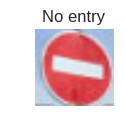

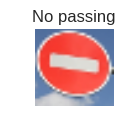

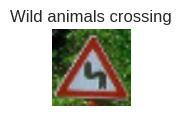

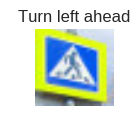

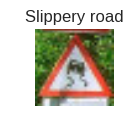

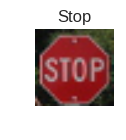

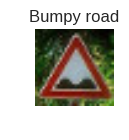

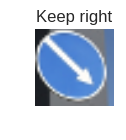

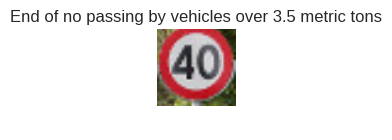

In [128]:
for image in images:
    prediction = tf.nn.softmax(logits)
  
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        my_classification = sess.run(tf.argmax(prediction, 1), feed_dict={x: [image]})
       
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.grid('off')
        plt.axis('off')
        plt.title(signnames[my_classification[0]])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model performed worse on captured images. The accuracy is 5/9 ≈ 56%

The order is the same as in previous question.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

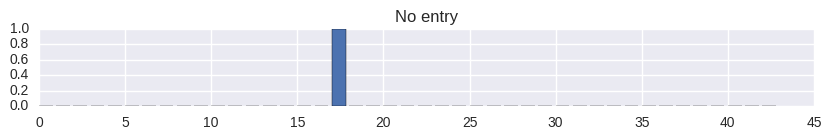

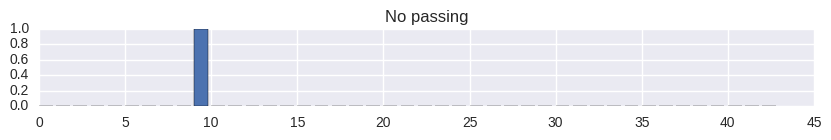

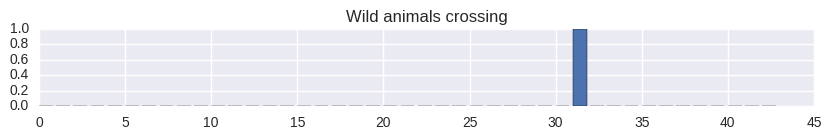

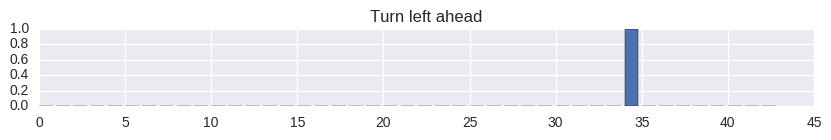

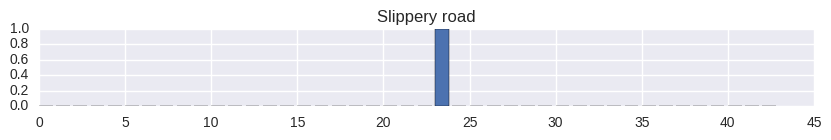

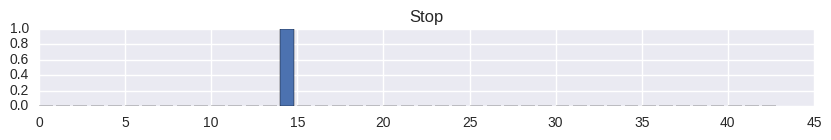

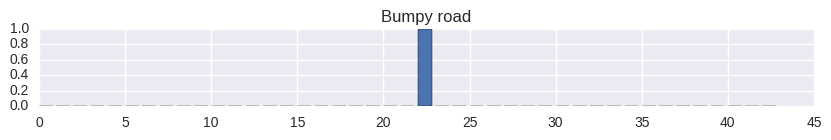

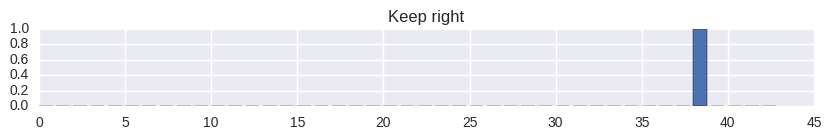

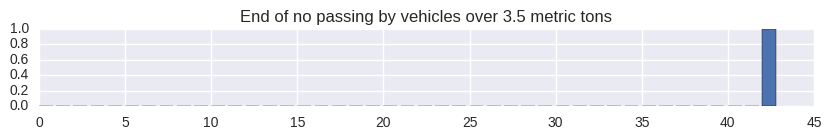

In [131]:
for image in images:

    plt.figure(figsize=(10,1))
    prediction = tf.nn.softmax(logits)

    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        softmax = sess.run(prediction, feed_dict={x: [image]})
        
        predicted_class = sess.run(tf.argmax(prediction, 1), feed_dict={x: [image]})

        ind = np.arange(43)
        plt.bar(ind, softmax[0])
        plt.title(signnames[predicted_class[0]])
        plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** It's quite obvious from visualisation in previous question that the model is pretty confident about each prediction.

There are two misclassified Russian signs that are present in German dataset (2nd and 3rd ones). For these signs probablities of correct labels are indistinguishable from probabilities of other incorrect labels. 

Other misclassfied Russian signs were not present or looked very differntly in German dataset. For those signs probabilities of the closest analog are visually the same as probabilities of other labels.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.